## Voting Classifier

### 1. Imports

In [67]:
import numpy as np
import pandas as pd

### 2. Loading dataset

In [68]:
df = pd.read_csv("Iris.csv")

In [69]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
# remove id column
df = df.iloc[:, 1:]

In [71]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
encoder = LabelEncoder()

In [74]:
df["Species"] = encoder.fit_transform(df["Species"])

In [75]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
import seaborn as sns

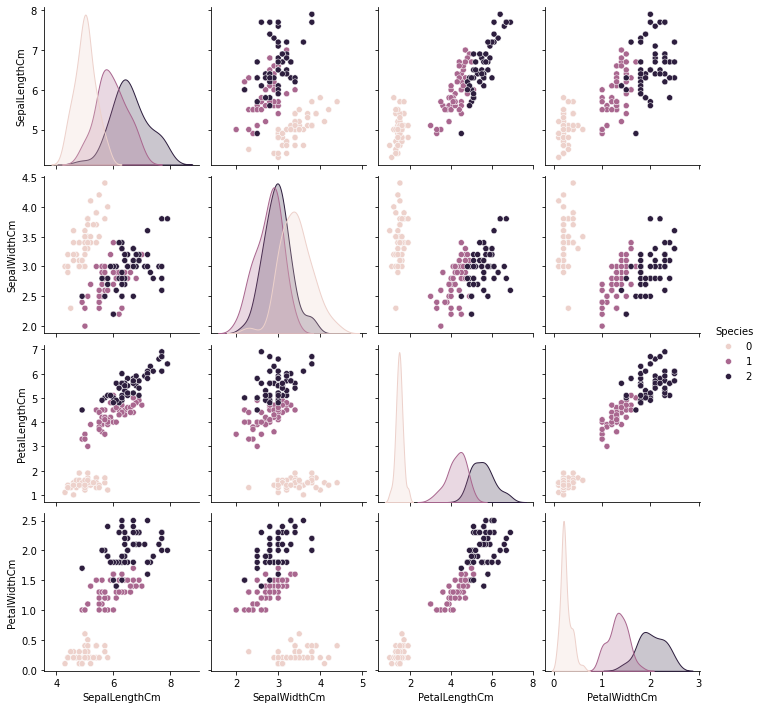

In [77]:
sns.pairplot(df, hue="Species")

In [78]:
new_df = df[df["Species"] != 0][['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [79]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [80]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [81]:
X

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [82]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### 3. Model Building

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [84]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [85]:
estimators = [('lr', clf1),('rf', clf2),('knn', clf3)]

In [86]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

lr 0.81
rf 0.73
knn 0.76


In [87]:
from sklearn.ensemble import VotingClassifier

#### a. Hard Voting

In [88]:
vc = VotingClassifier(estimators=estimators, voting='hard')
x = cross_val_score(vc, X, y, cv=10, scoring="accuracy")
print(np.round(np.mean(x), 2))

0.76


#### b. Soft Voting

In [103]:
vcs = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vcs, X, y, cv=10, scoring="accuracy")
print(np.round(np.mean(x), 2))

0.77


### Try on Another dataset

In [90]:
from sklearn.datasets import fetch_covtype

In [91]:
df = fetch_covtype()

In [92]:
X_c = df['data']
y_c = df['target']

In [93]:
print(X_c.shape)
print(y_c.shape)

(581012, 54)
(581012,)


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, shuffle=True)

In [96]:
X_train.shape

(464809, 54)

In [97]:
X_test.shape

(116203, 54)

In [98]:
vc1 = vcs.fit(X_train, y_train)

/home/surajkarki/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
s = vcs.score(X_test, y_test)

In [102]:
print(s)

0.9654139738216742
